<a href="https://colab.research.google.com/github/SHAKIL-25/Ai/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

## Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore", category=FutureWarning)

## Import Dataset

In [3]:
Diabetes_df=pd.read_csv('diabetes_prediction_dataset.csv')
Diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# EDA (Exploratory Data Analysis)

## Data Understanding

In [4]:
Diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
Diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
Diabetes_df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [7]:
Duplicate=Diabetes_df.duplicated().sum()
print("Duplicate Data in dataframe:", Duplicate)

Duplicate Data in dataframe: 3854


In [8]:
row, column=Diabetes_df.shape
print("Row of Dataset:", row)
print("Column of Dataset:", column)

Row of Dataset: 100000
Column of Dataset: 9


## Visualization

### Visualization of Patient's Gender

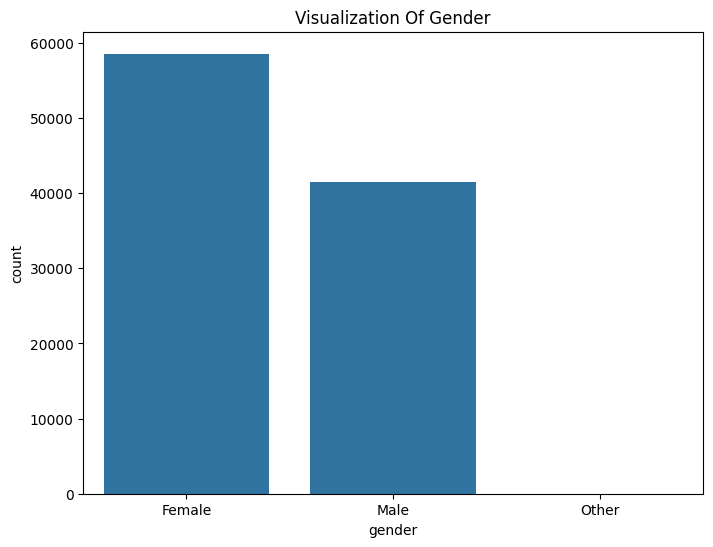

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(data=Diabetes_df, x='gender')
plt.title('Visualization Of Gender')
plt.show()

### Visualization Of Patient's Smoking History

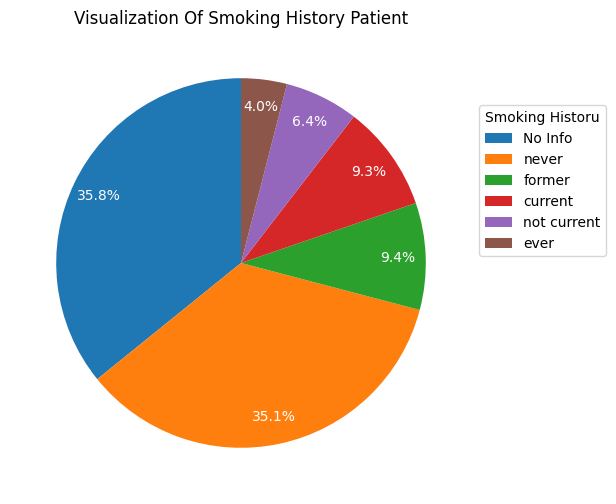

In [10]:
count_smoking= Diabetes_df['smoking_history'].value_counts()

plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_smoking.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    textprops={'color':'white'}
)
plt.title('Visualization Of Smoking History Patient')
plt.legend(wedges, count_smoking.index, title="Smoking Historu", loc="lower left", bbox_to_anchor=(1,0.5))
plt.show()

### Visualization of Patient's Hypertension Status

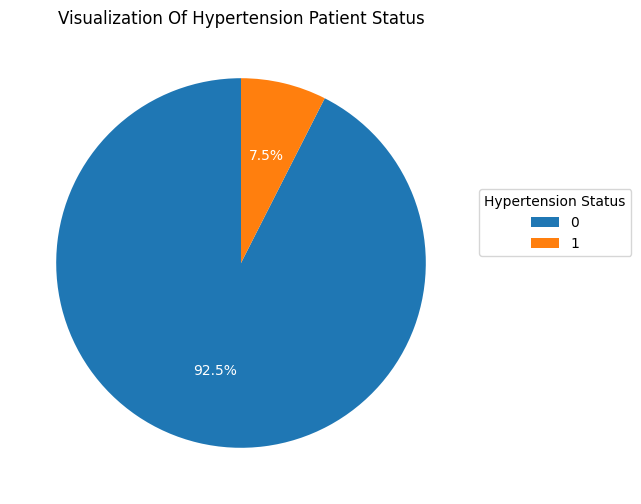

In [11]:
count_hypertension=Diabetes_df['hypertension'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_hypertension.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.6,
    textprops={'color':'white'}
)

plt.title('Visualization Of Hypertension Patient Status')
plt.legend(wedges, count_hypertension.index, title="Hypertension Status", loc="lower left", bbox_to_anchor=(1,0.5))
plt.show()

### Visualization of Patient's Heart Disease status

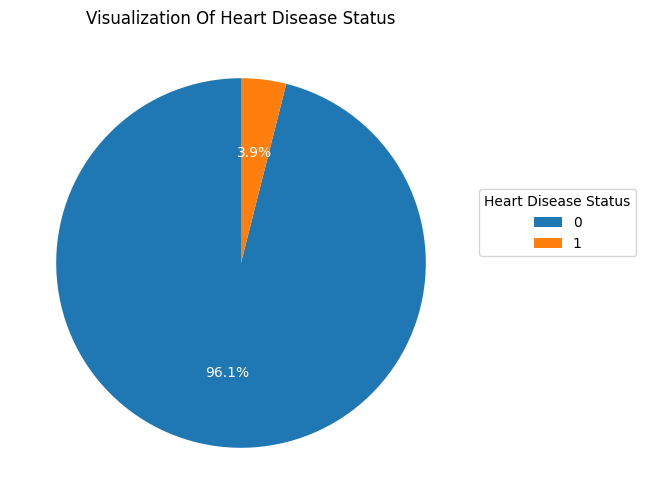

In [12]:
count_heart_disease=Diabetes_df['heart_disease'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts=plt.pie(
    count_heart_disease.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.6,
    textprops={'color':'white'}
)

plt.title('Visualization Of Heart Disease Status')
plt.legend(wedges, count_heart_disease.index, title="Heart Disease Status", loc="lower left", bbox_to_anchor=((1,0.5)))
plt.show()

### Visualization of Patient's Diabetes Status

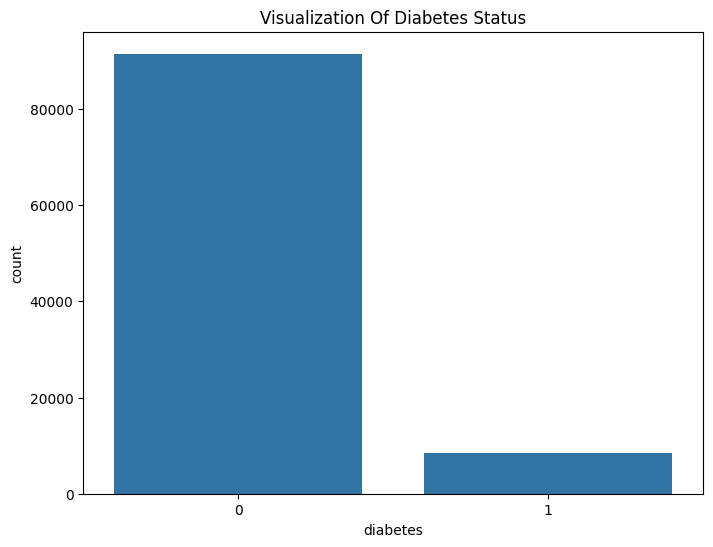

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data=Diabetes_df, x='diabetes')
plt.title("Visualization Of Diabetes Status")
plt.show()

### Visualization of Numeric Distribution Data

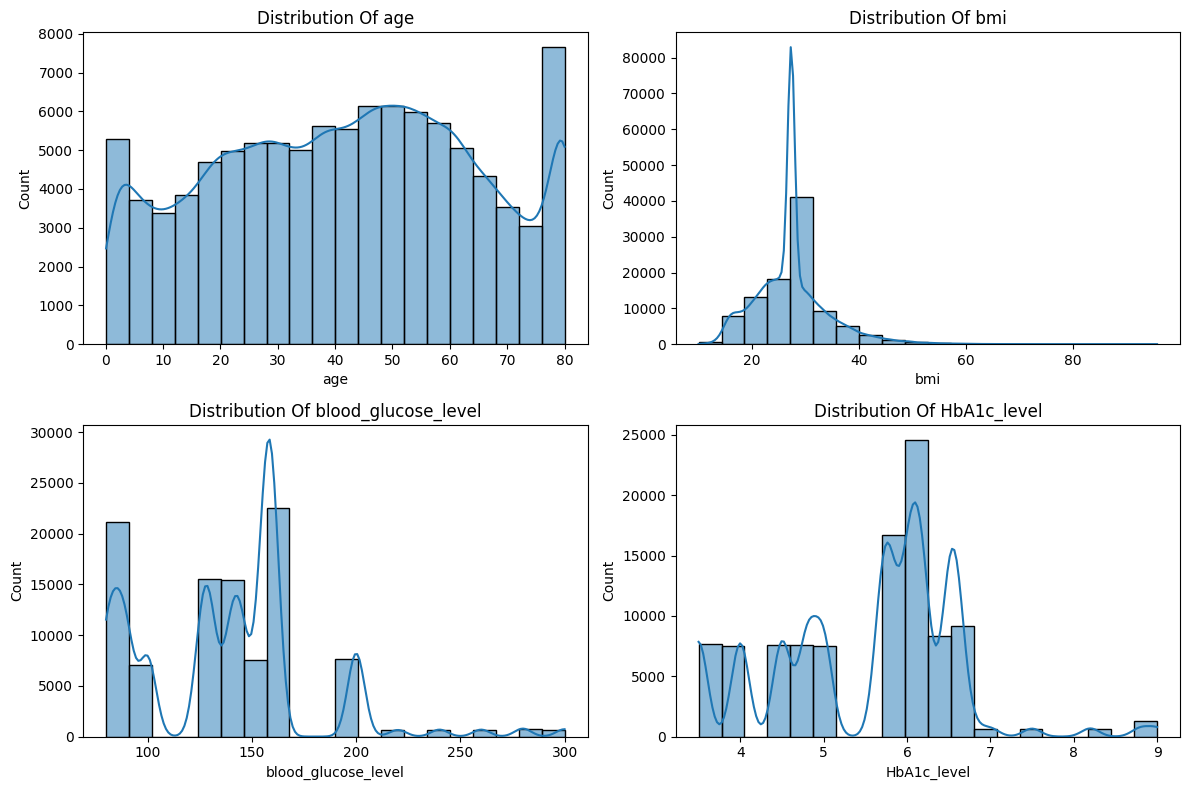

In [14]:
num_cat=['age', 'bmi','blood_glucose_level','HbA1c_level']

fig, axs=plt.subplots(2,2 ,figsize=(12,8))
axs=axs.flatten()

for i, col in enumerate(num_cat):
    sns.histplot(Diabetes_df[col], bins=20, kde=True, edgecolor='black', ax=axs[i])
    axs[i].set_title(f'Distribution Of {col}')
    axs[i].set_xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Visualization of Numerical Boxplot of The Data

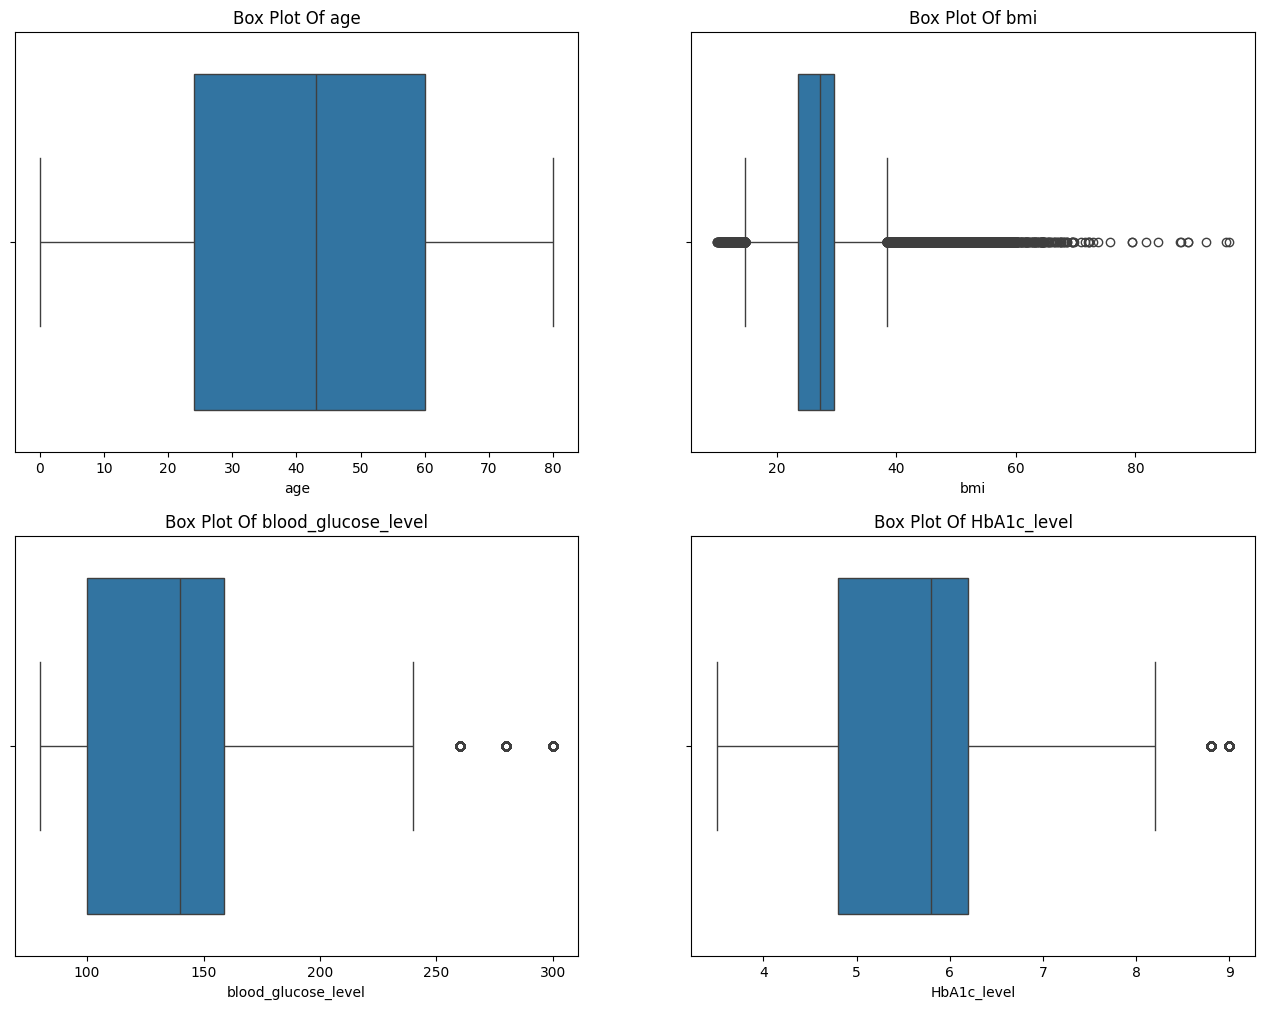

<Figure size 640x480 with 0 Axes>

In [15]:
fig, axs=plt.subplots(2,2, figsize=(16,12))
axs=axs.flatten()
for i, col in enumerate(num_cat):
    sns.boxplot(data=Diabetes_df, x=col, ax=axs[i])
    axs[i].set_title(f'Box Plot Of {col}')
    axs[i].set_xlabel(col)

plt.show()
plt.tight_layout()

### Visualization of Diabetes Status vs Medical Data

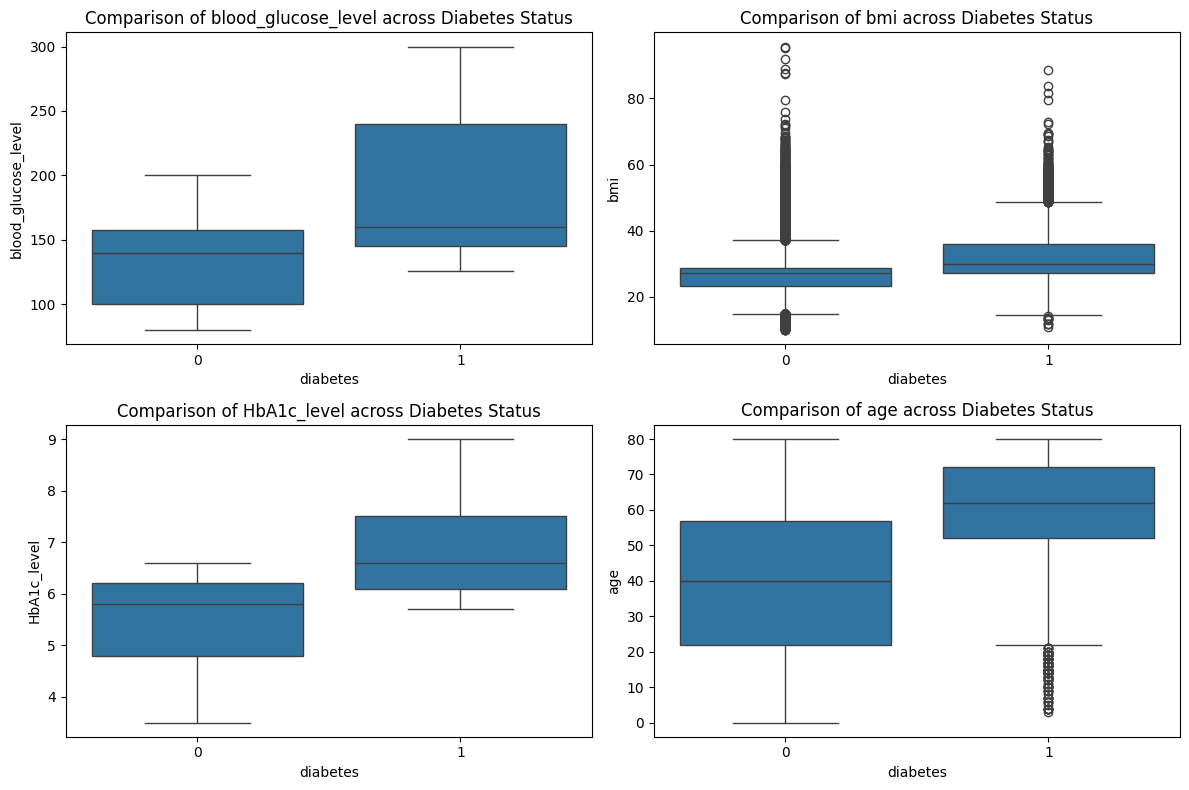

In [16]:
glucose=['blood_glucose_level','bmi','HbA1c_level','age']

fig, axs=plt.subplots(2,2, figsize=(12,8))
axs=axs.flatten()
for i, col in enumerate(glucose):
    sns.boxplot(data=Diabetes_df, x='diabetes', y=col, ax=axs[i])
    axs[i].set_title(f'Comparison of {col} across Diabetes Status')

plt.tight_layout()
plt.show()

### Visualization Of Hypertension Status VS Medical Data

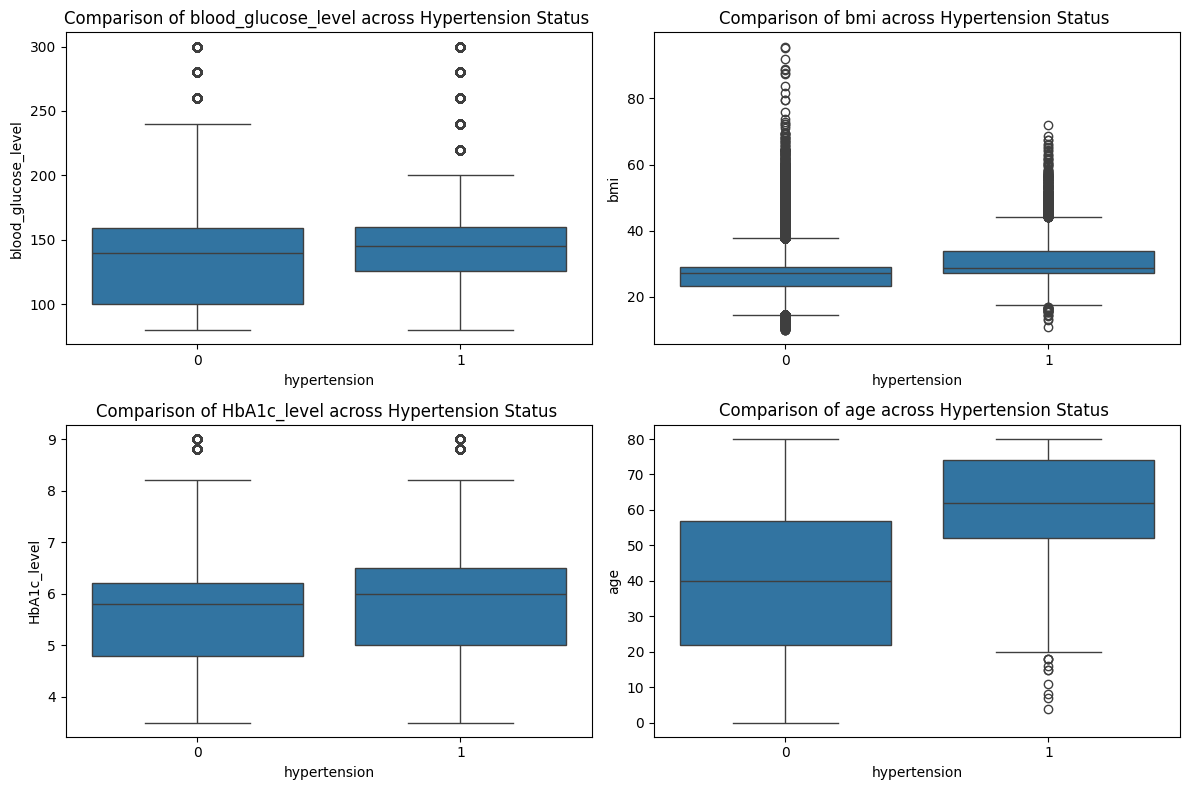

In [17]:
fig, axs=plt.subplots(2,2, figsize=(12,8))
axs=axs.flatten()

for i, col in enumerate(glucose):
    sns.boxplot(data=Diabetes_df, x='hypertension', y=col, ax=axs[i])
    axs[i].set_title(f'Comparison of {col} across Hypertension Status ')

plt.tight_layout()
plt.show()


### Visualization of Heart Disease Status VS Medical Data

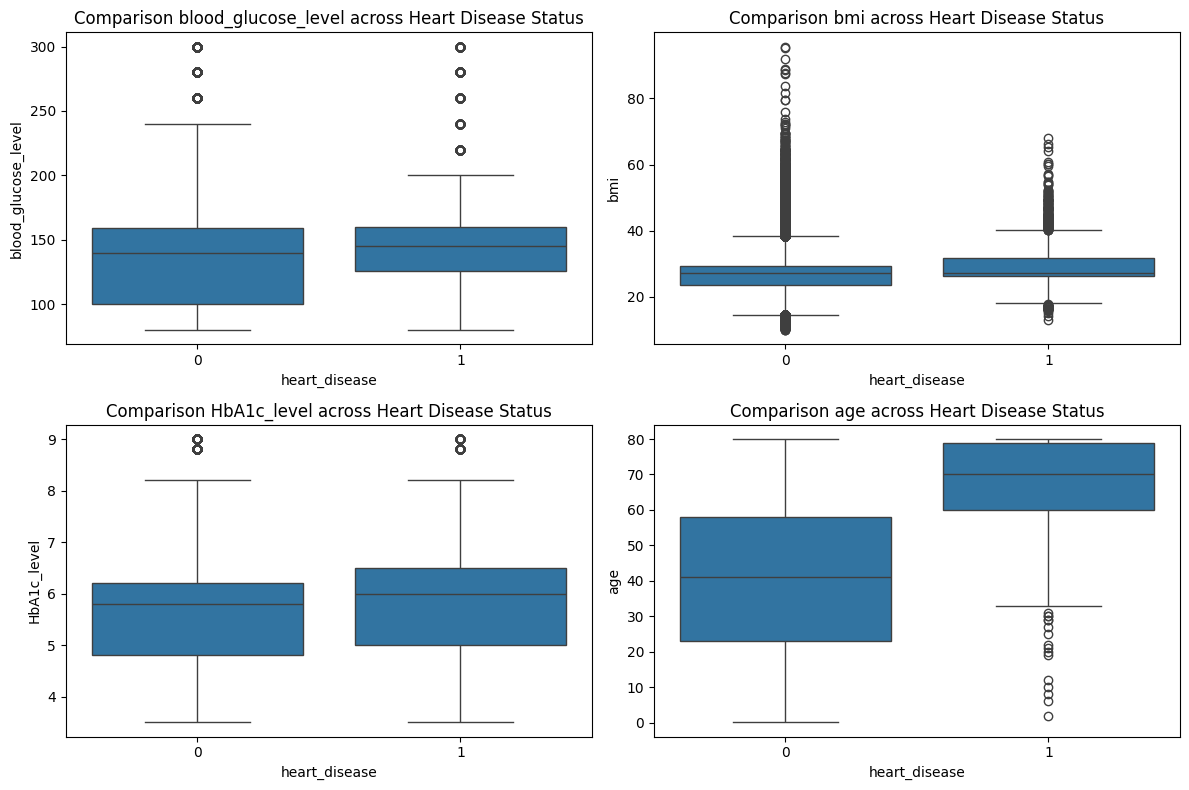

In [18]:
fig, axs=plt.subplots(2,2 , figsize=(12,8))
axs=axs.flatten()

for i, col in enumerate(glucose):
    sns.boxplot(data=Diabetes_df, x='heart_disease', y=col, ax=axs[i])
    axs[i].set_title(f'Comparison {col} across Heart Disease Status')

plt.tight_layout()
plt.show()

### Visualization of Smoking History VS Gender

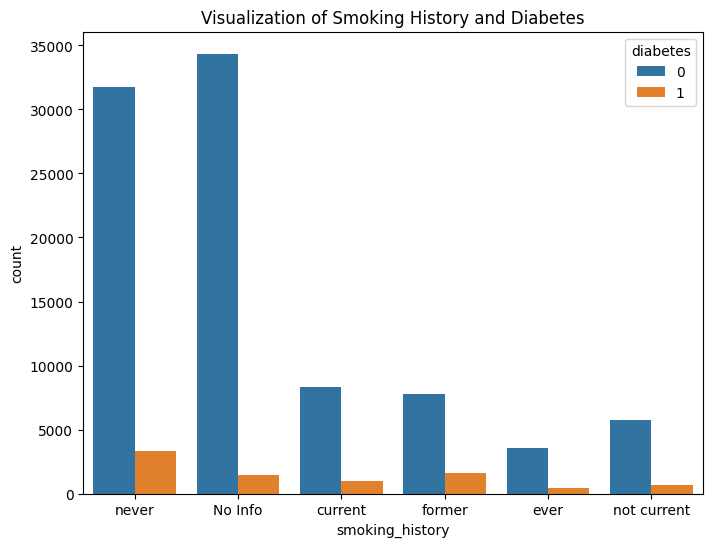

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(data=Diabetes_df, x='smoking_history', hue='diabetes')
plt.title('Visualization of Smoking History and Diabetes')
plt.show()

### Visualization of Diabetes Status VS Hypertension Status

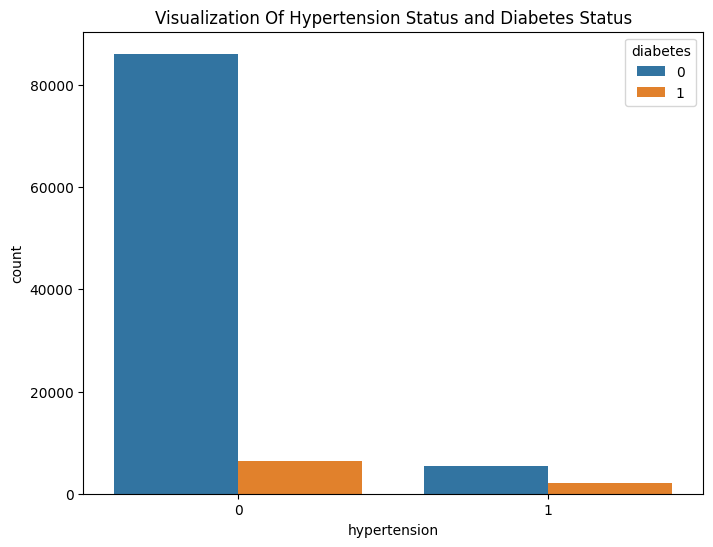

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(data=Diabetes_df, x='hypertension', hue='diabetes')
plt.title('Visualization Of Hypertension Status and Diabetes Status')
plt.show()

### Visualization of Heart Disease Status VS Diabetes Status

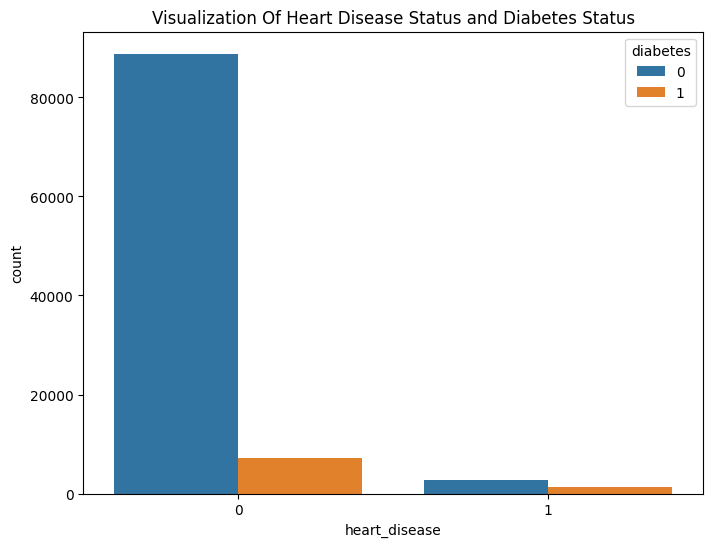

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(data=Diabetes_df, x='heart_disease', hue='diabetes')
plt.title('Visualization Of Heart Disease Status and Diabetes Status')
plt.show()

### Heatmap of Medical Data

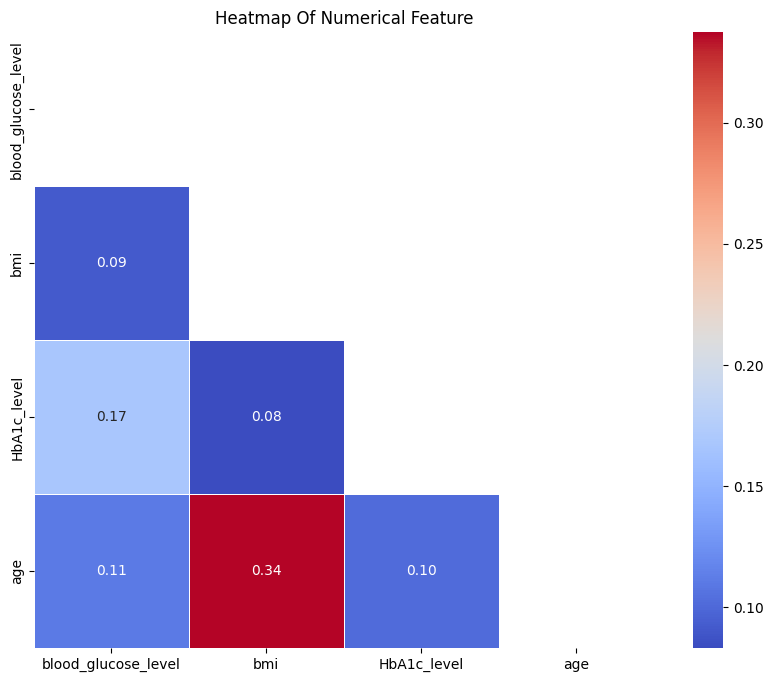

In [22]:
num_column=Diabetes_df[['blood_glucose_level','bmi','HbA1c_level','age']]
corr_num=num_column.corr()
mask=np.triu(np.ones_like(corr_num, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr_num, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask, fmt='.2f' )
plt.title('Heatmap Of Numerical Feature')
plt.show()

# Preprocessing

## Mismatch Data Handling

In [23]:
Diabetes_df[Diabetes_df.age <1].age.value_counts()

,count
age,
0.72,104
0.80,102
0.64,99
0.56,96
0.88,90
0.32,89
0.24,87
0.48,83
0.40,66


In [24]:
Diabetes_df.loc[Diabetes_df.age <1, 'age']=Diabetes_df.loc[Diabetes_df.age <1, 'age'] *100

In [25]:
Diabetes_df[Diabetes_df.age <1].age.value_counts()

,count
age,


In [26]:
Diabetes_df=Diabetes_df.drop_duplicates()

In [27]:
Diabetes_df.shape

(96121, 9)

In [28]:
Diabetes_df=Diabetes_df[Diabetes_df['gender'] !='Other']

## Duplicate Data Handling

In [29]:
Duplicate=Diabetes_df.duplicated().sum()
print("Duplicate Data In Dataframe:", Duplicate)

Duplicate Data In Dataframe: 0


## Outlier Handling

In [30]:
def outlier_handling(df, columns):
    df_cleaned=df.copy()
    for col in columns:
        if pd.api.types.is_numeric_dtype(df_cleaned[col]):
            Q1=df_cleaned[col].quantile(0.25)
            Q3=df_cleaned[col].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1- 1.5 * IQR
            upper_bound= Q3 + 1.5 * IQR
            df_cleaned=df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    df_cleaned=df_cleaned.reset_index(drop=True)
    return df_cleaned

Diabetes_df=outlier_handling(Diabetes_df, columns=['blood_glucose_level','bmi','age','HbA1c_level'])

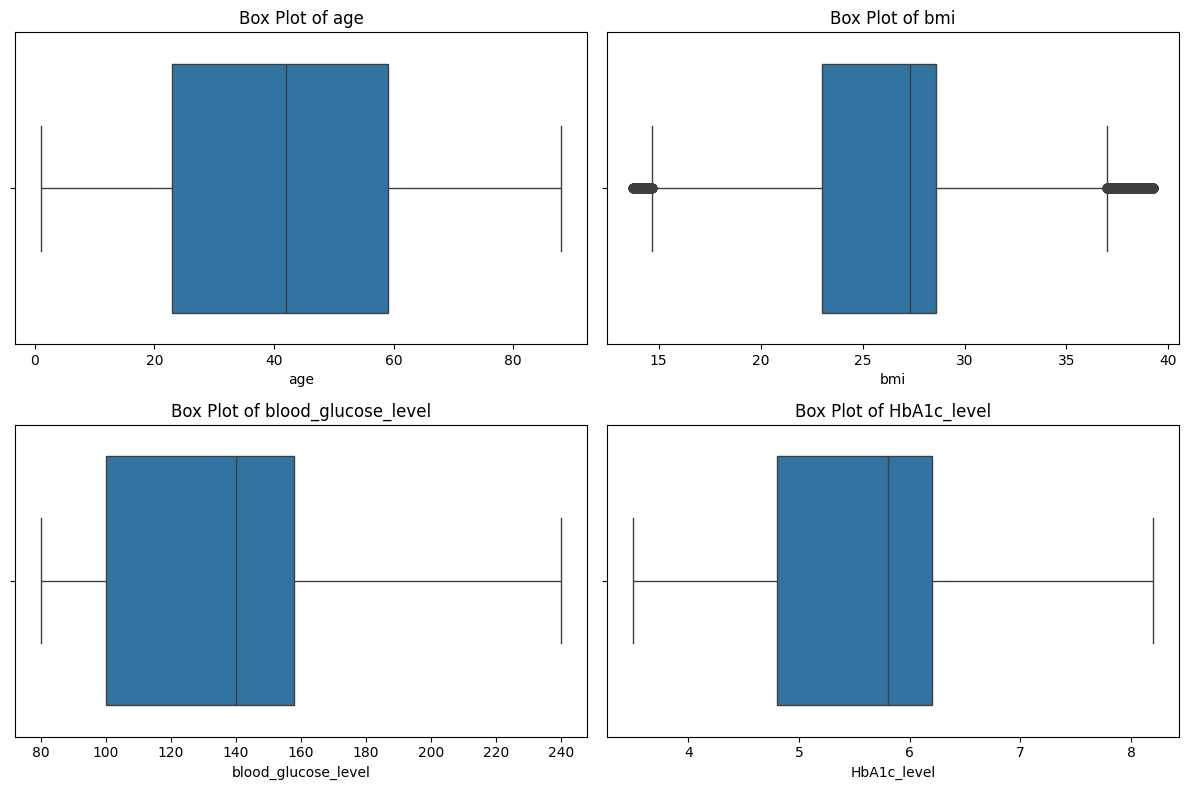

In [31]:
fig, axs=plt.subplots(2,2, figsize=(12,8))
axs=axs.flatten()

for i, col in enumerate(num_cat):
    sns.boxplot(data=Diabetes_df, x=Diabetes_df[col], ax=axs[i])
    axs[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

## Encodode

In [32]:
gender_encode={
    'Male':0,
    'Female':1
}
smoking_encode={
    'never':0,
    'not current':1,
    'former':2,
    'current':3,
    'ever':4,
    'No Info':5
}
Diabetes_df['gender']=Diabetes_df['gender'].map(gender_encode)
Diabetes_df['smoking_history']=Diabetes_df['smoking_history'].map(smoking_encode)
Diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.6,140,0
1,1,54.0,0,0,5,27.32,6.6,80,0
2,0,28.0,0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,3,23.45,5.0,155,0
4,0,76.0,1,1,3,20.14,4.8,155,0


## Oversample

In [33]:
diabetes_df_majority=Diabetes_df[Diabetes_df['diabetes']==0]
diabetes_df_minority=Diabetes_df[Diabetes_df['diabetes']==1]

diabetes_df_minority_oversample=resample(
    diabetes_df_minority,
    replace=True,
    n_samples=len(diabetes_df_majority),
    random_state=42
)
Diabetes_df=pd.concat([diabetes_df_majority, diabetes_df_minority_oversample])
Diabetes_df=Diabetes_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [34]:
Diabetes_df['diabetes'].value_counts()

,count
diabetes,
1,83302
0,83302


# Modelling

## Split Data Train and Data Test

In [35]:
X=Diabetes_df.drop('diabetes', axis=1)
y=Diabetes_df['diabetes']

In [36]:
X_train, X_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(f'Training Data Shape: X_train {X_train.shape}, y_train{y_train.shape}')
print(f'Testing Data Shape: X_test {X_test.shape}, y_test {y_test.shape}')

Training Data Shape: X_train (133283, 8), y_train(133283,)
Testing Data Shape: X_test (33321, 8), y_test (33321,)


## Random Forest

In [37]:
Rf=RandomForestClassifier().fit(X_train, y_train)
eval_rf=Rf.predict(X_test)

acc_rf=accuracy_score(eval_rf, y_test)
precision_rf=precision_score(eval_rf, y_test)
recall_rf=recall_score(eval_rf, y_test)
f1_rf=f1_score(eval_rf, y_test)

In [38]:
result_df=({
    "Accuracy":[acc_rf],
    "Precisious":[precision_rf],
    "Recall":[recall_rf],
    "F1 Score":[f1_rf]
})
result_df=pd.DataFrame(result_df, index=['Random Forest'])
result_df

,Accuracy,Precisious,Recall,F1 Score
Random Forest,0.992977,1.0,0.986178,0.993041


## Logistic Regression

In [39]:
Lg=LogisticRegression(max_iter=1000).fit(X_train, y_train)
eval_lg=Lg.predict(X_test)

acc_lg=accuracy_score(eval_lg, y_test)
precision_lg=precision_score(eval_lg,y_test)
recall_lg=recall_score(eval_lg, y_test)
f1_lg=f1_score(eval_lg, y_test)

In [40]:
result_df.loc['Logistic Regression']=[acc_lg, precision_lg, recall_lg, f1_lg]
result_df

,Accuracy,Precisious,Recall,F1 Score
Random Forest,0.992977,1.000000,0.986178,0.993041
Logistic Regression,0.861469,0.875112,0.852342,0.863577


## Decision Tree

In [41]:
Dt=DecisionTreeClassifier().fit(X_train, y_train)
eval_dt=Dt.predict(X_test)

acc_dt=precision_score(eval_dt, y_test)
precision_dt=precision_score(eval_dt, y_test)
recall_dt=recall_score(eval_dt, y_test)
f1_dt=f1_score(eval_dt, y_test)

In [42]:
result_df.loc['Decision Tree']=[acc_dt, precision_dt, recall_dt, f1_dt]
result_df

,Accuracy,Precisious,Recall,F1 Score
Random Forest,0.992977,1.000000,0.986178,0.993041
Logistic Regression,0.861469,0.875112,0.852342,0.863577
Decision Tree,1.000000,1.000000,0.972109,0.985857


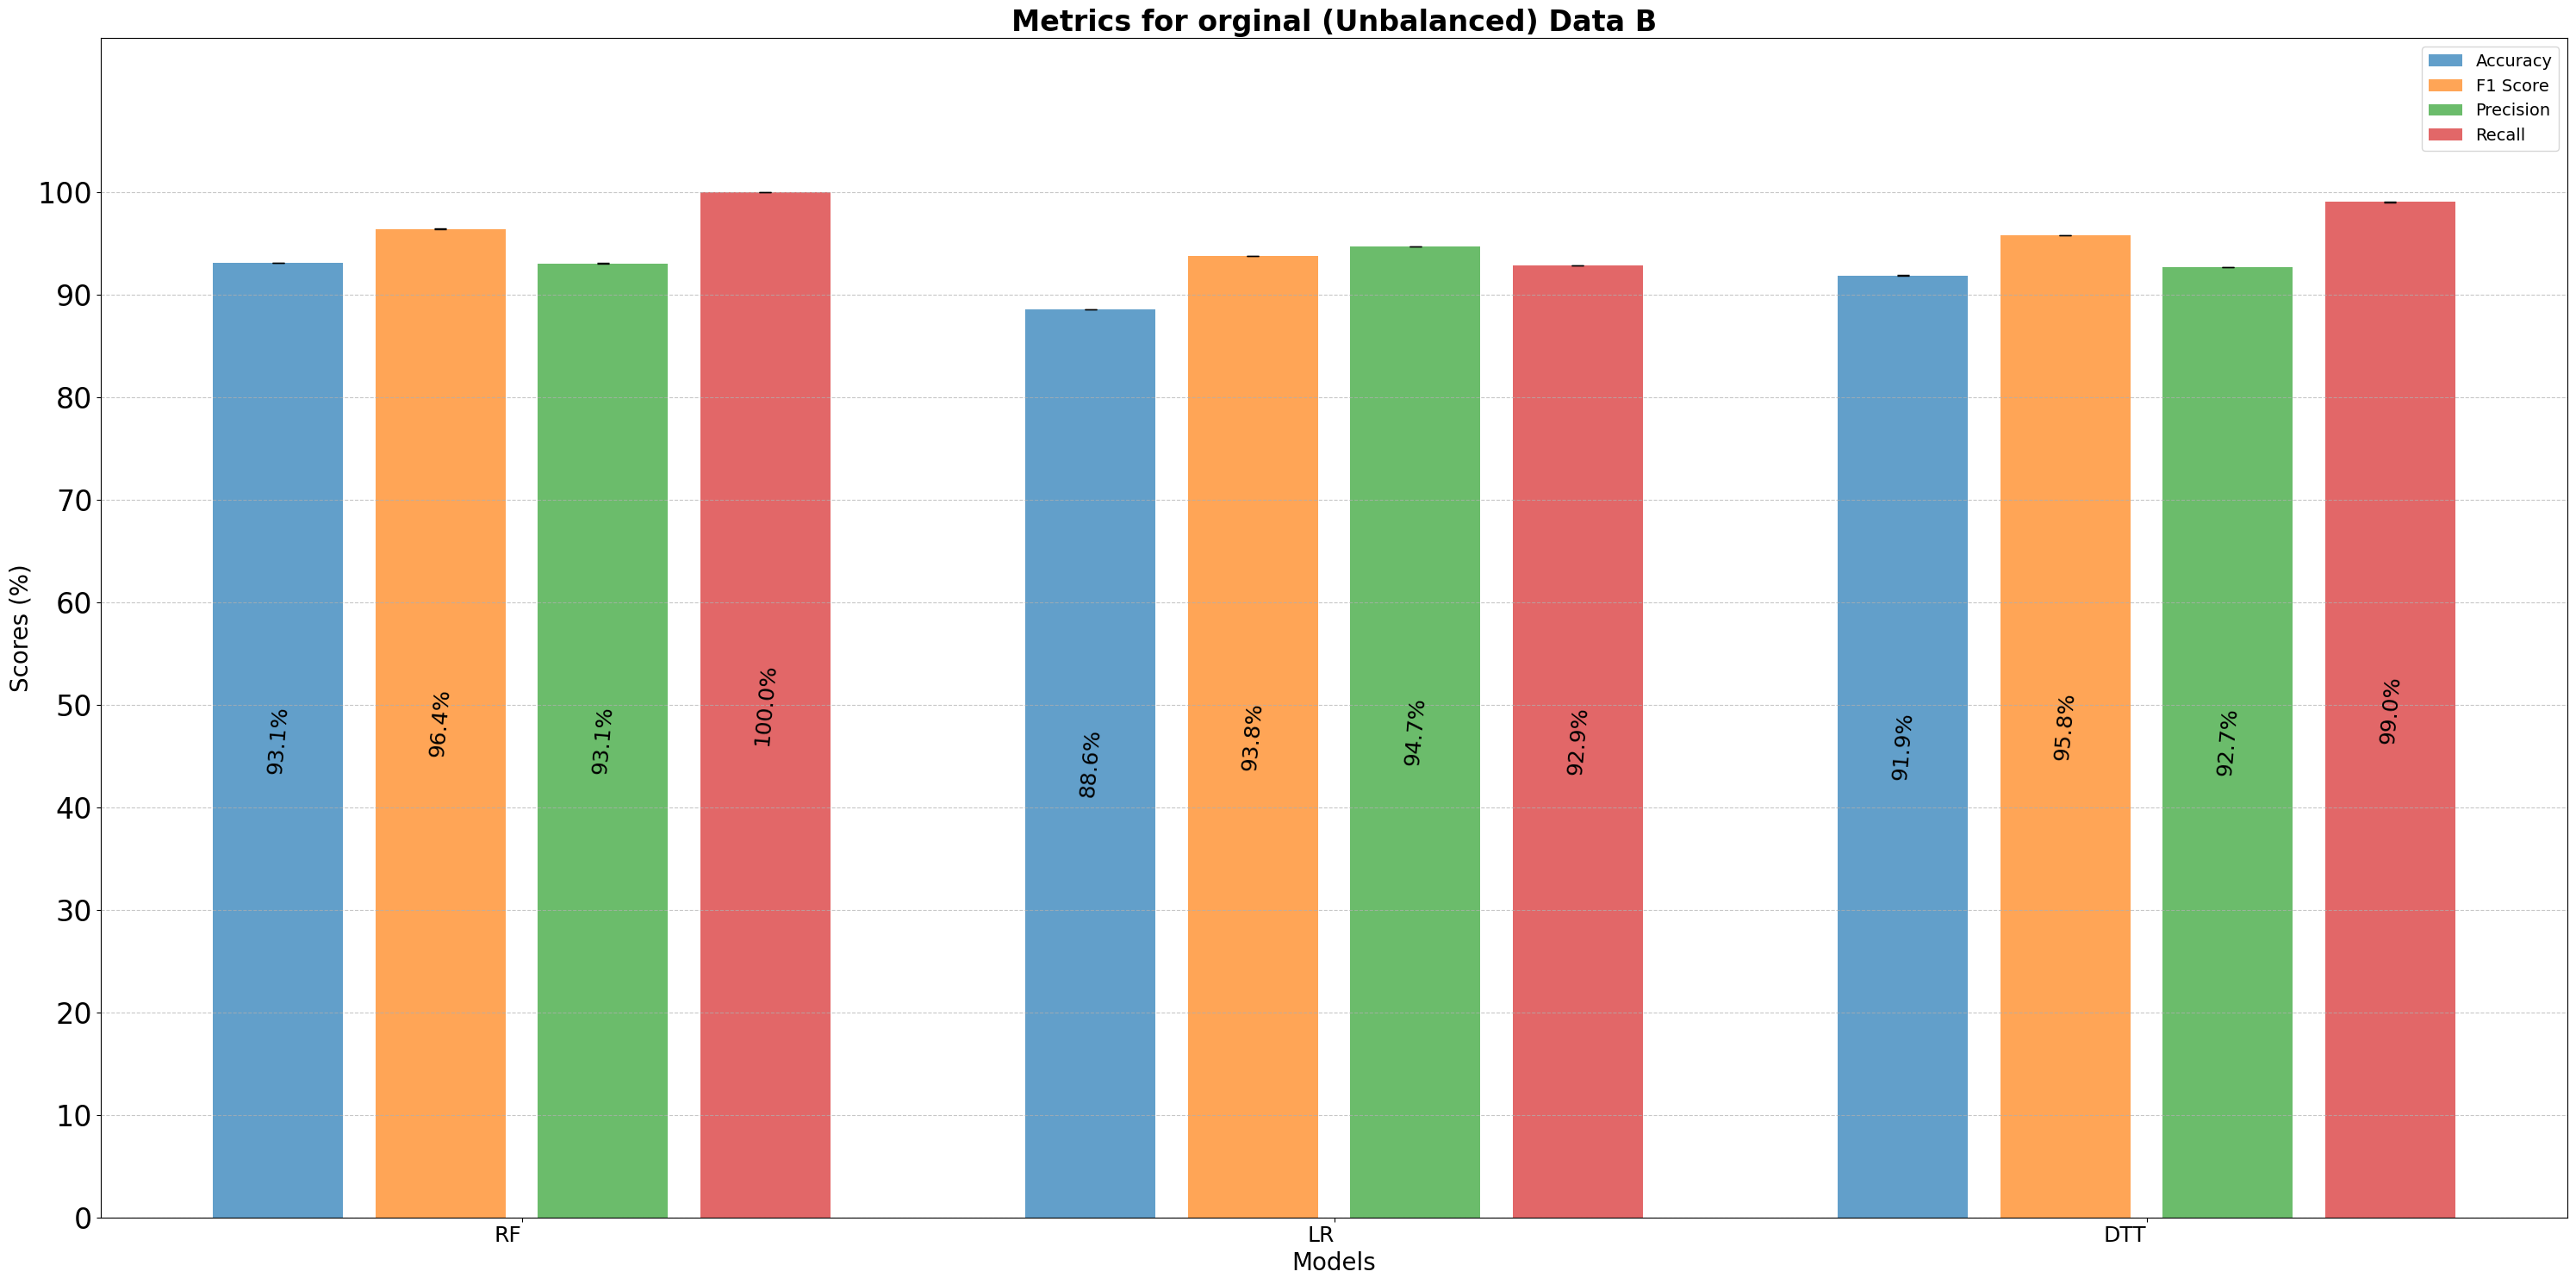

In [43]:
# Model names and their corresponding metrics
models = ['RF', 'LR', 'DTT',]

# Accuracy, Precision, Recall, F1 Score for each model (updated based on the provided data)
accuracy = [100 * x for x in [
    0.9307228915662651, 0.8855421686746988, 0.9186746987951807,
]]
precision = [100 * x for x in [
    0.9305135951661632, 0.9470198675496688, 0.9270516717325228,
]]
recall = [100 * x for x in [
    1.0, 0.9285714285714286, 0.9902597402597403,
]]
f1_score = [100 * x for x in [
    0.9640062597809077, 0.9377049180327869, 0.957613814756672,
]]

# Dummy error values for error bars (calculated or assumed for the sake of this example)
error_accuracies = [0.02, 0.03, 0.02, ]
error_precisions = [0.01, 0.02, 0.01, ]
error_recalls = [0.01, 0.01, 0.02, ]
error_f1_scores = [0.02, 0.03, 0.02, ]

# Metrics and labels
metrics = [accuracy, f1_score, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar chart setup
x_pos = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(30, 15))

# Plot grouped bars with error bars
for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    bar = ax.bar(
        x_pos + i * width, metric, width * 0.8, yerr=errors,
        label=label, alpha=0.7, ecolor='black', capsize=5
    )

    # Add labels for the bar values inside the bars
    for j, (rect, value) in enumerate(zip(bar, metric)):
        height = rect.get_height()

        offset_x = rect.get_x() + rect.get_width() / 2.0
        offset_y = height * 0.5

        # For `0.0%` values, place the text inside the bar with a small gap
        if value == 0.0:
            ax.text(
                offset_x,
                1,  # Add a small gap above the bottom of the bar
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=5,  # No rotation for 0.0%
                rotation_mode='anchor'
            )

        else:
            ax.text(
                offset_x,
                offset_y,
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=85,  # Rotate the non-zero text
                rotation_mode='anchor'
            )
x_pos_adjusted = x_pos.copy()
x_pos_adjusted[-1] += 0.2

# Styling and layout
ax.set_title('Metrics for orginal (Unbalanced) Data B', fontsize=24, weight='bold')
ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('Scores (%)', fontsize=20)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, ha= 'right', fontsize=18)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 110, 10))
ax.tick_params(axis='y', labelsize=24)
ax.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Metrics for orginal (Unbalanced) Data B.pdf', bbox_inches='tight')
plt.show()